In [4]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from keras.utils import np_utils
# np.random.seed(10)
from keras.datasets import mnist
import matplotlib.pylab as plt
from keras.models import Sequential # 建立模型
from keras.layers import Dense

In [5]:
def show_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2) # 數字圖片的大小
    plt.imshow(image, cmap = 'binary') # cmap(colormap)
    # cmap='binary' 表示使用二值化的颜色映射
    # 這種颜色映射用於將灰度圖像或二進制圖像以黑白形式顯示，其中較亮的部分顯示為白色，較暗的部分顯示為黑色。
    plt.show()
    
def show_images_labels_predictions(images, labels, predictions, start_id, num = 10):
    plt.gcf().set_size_inches(12, 14)
    if num > 25:num = 25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        #顯示黑白圖片
        ax.imshow(images[start_id], cmap='binary')

        # 有 AI 預測結果資料, 才在標題顯示預測結果
        if( len(predictions) > 0 ) :
            title = 'ai = ' + str(predictions[i])
            # 預測正確顯示(o), 錯誤顯示(x)
            title += (' (o)' if predictions[i]==labels[i] else ' (x)')
            title += '\nlabel = ' + str(labels[i])
        # 沒有 AI 預測結果資料, 只在標題顯示真實數值
        else :
            title = 'label = ' + str(labels[i])

        # X, Y 軸不顯示刻度
        ax.set_title(title,fontsize=12)
        ax.set_xticks([]);ax.set_yticks([])
        start_id+=1
    plt.show()
    
(train_feature, train_label), (test_feature, test_label) = mnist.load_data()

In [6]:
# Feature 轉成 1 維向量
train_feature_vector = train_feature.reshape(len(train_feature), 28*28).astype('float32')
test_feature_vector = test_feature.reshape(len(test_feature), 28*28).astype('float32')
# Feature 標準化
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255
# Label 轉 One-Hot Encoding 編碼
train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)

# Model

In [7]:
model = Sequential()
# 輸入層784, 隱藏層256, 輸出層10
model.add(Dense(units = 256,
         input_dim = 28*28,
         kernel_initializer = 'normal',
         activation = 'relu'))
model.add(Dense(units = 10,
         kernel_initializer = 'normal',
         activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


2023-09-14 11:52:16.277296: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
# 定義訓練方式
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam', metrics = ['accuracy'])
train_history = model.fit(x = train_feature_normalize,
                         y = train_label_onehot,
                         validation_split = 0.2,
                         epochs = 10, batch_size = 200, verbose = 2)
# verbose 是否顯示訓練過程 0不顯示 1詳細顯示 2簡易顯示 

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing t

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 0s 962us/step


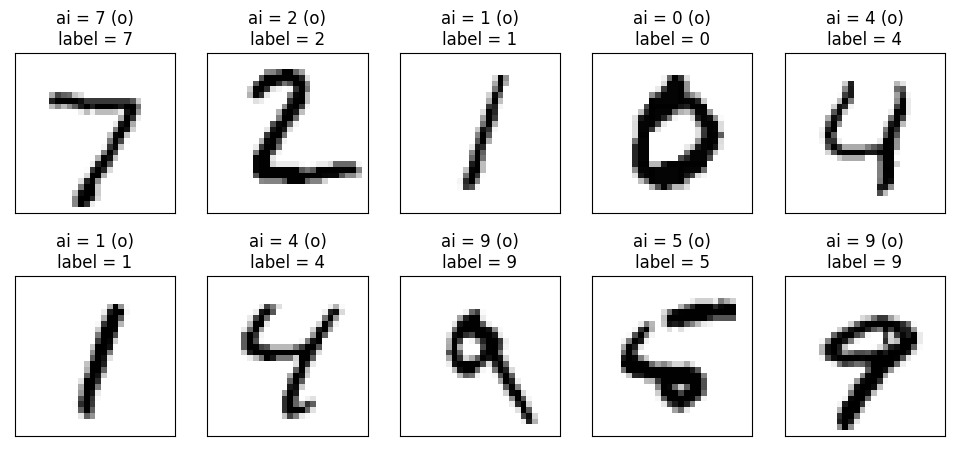

In [14]:
predic_x = model.predict(test_feature_normalize)
classes_x = np.argmax(predic_x, axis = 1)

show_images_labels_predictions(test_feature, test_label, classes_x, 0)

# prediction= model.predict_classes(test_feature_normalize)

# show_images_labels_predictions(test_feature, test_label, prediction, 0)
# 第二個程式碼塊首先獲得原始概率分佈，然後從中提取類別索引，而第一個程式碼塊直接獲得類別索引。
# 注意：在TensorFlow 2.0及以後的版本中，predict_classes 方法已被廢棄
# 建議使用第一個程式碼塊中的方法，即使用 predict 方法和 np.argmax 來獲得類別
# 因為 predict_classes 在未來版本中可能會被移除，而 np.argmax 在不同版本中都可用。

# model.save('Mnist_mlp_model.h5')

In [15]:
model.save('Mnist_mlp_model.h5')